<img src="https://upload.wikimedia.org/wikipedia/commons/c/ca/Walmart_logo.svg" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

# PART 1 - EDA & Proprocessing

## 1.1 Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [2]:
df = pd .read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [3]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print("Number of columns : {}".format(df.shape[1]))
print()

print("Display of df: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include="all")
display(data_desc)
print()

print("Percentage of missing values: ")
display(100 * df.isnull().sum() / df.shape[0])

Number of rows : 150
Number of columns : 8

Display of df: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


- Store : Store Number
- Date : Date
- Weekly_Sales : Sales for the given store
- Holiday_Flag : Whether the week is a special holiday week 1 – Holiday week 0 – Non holiday week
- Temperature : Temperature on the day of the sale
- Fuel_Price : Cost of fuel in the region
- CPI : Consumer Price Index
- Unemployment : Unemployment rate

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

num_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

fig = make_subplots(rows=1, cols=len(num_features))

for i, feature in enumerate(num_features):
    fig.add_trace(go.Box(y=df[feature], name=feature), row=1, col=i+1)

fig.update_layout(boxmode='group') 
fig.show()

## 1.2. Preprocessing

### - Since our target is the Weekly_sales column, we can't have missing values ​​in this column. We never use imputation techniques on the target : it might create some bias in the predictions ! We will delete the rows where Weekly_sales has a missing data

In [6]:
#Drop rows where Weekly_Sales is NaN
df = df.dropna(subset=['Weekly_Sales'])

In [7]:
print("Percentage of missing values: ")
display(100 * df.isnull().sum() / df.shape[0])

Percentage of missing values: 


Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
dtype: float64

### - We see that we have missing values ​​in the Date column but since the dates are not consecutive, we will not be able to use a technique to replace the missing values ​​with a close date. To avoid introducing bias, we choose to delete the rows with missing dates.

In [8]:
#Drop rows where Weekly_Sales is NaN
df = df.dropna(subset=['Date'])
print(f'Missing values in date column: {df["Date"].isna().sum()}')

Missing values in date column: 0


In [9]:
#Convert Date to datetime format and create new columns, year, month, day, weekday
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.head()
df.loc[:, "year"] = df["Date"].dt.year
df.loc[:, "month"] = df["Date"].dt.month
df.loc[:, "day"] = df["Date"].dt.day

weekdays_dict = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df.loc[:, "weekday"] = df["Date"].dt.weekday.map(weekdays_dict)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18,Friday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,Friday
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,Friday
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,Friday
6,15.0,2011-06-03,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,6,3,Friday


Now we have year, month, day and weekday column, we can drop date column

In [10]:
df = df.drop('Date', axis = 1)

In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*

In [11]:
# Define the outlier columns
outlier_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Function to remove outliers based on the 3 standard deviation rule
def remove_outliers(df, cols):
    for col in cols:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers(df, outlier_cols)


In [12]:
print(f"Lines before : {len(df)}")
print(f"Lines after : {len(df_cleaned)}")
print(f"Lines deleted : {len(df) - len(df_cleaned)}")


Lines before : 118
Lines after : 80
Lines deleted : 38


### After this first cleaning of outliers, we end up with only 80 lines. This is very few, we risk having overfitting

In [13]:
df_cleaned.isnull().sum() / len(df_cleaned) * 100

Store            0.00
Weekly_Sales     0.00
Holiday_Flag    11.25
Temperature      0.00
Fuel_Price       0.00
CPI              0.00
Unemployment     0.00
year             0.00
month            0.00
day              0.00
weekday          0.00
dtype: float64

### The Holiday_Flag column corresponds to the holiday date. 1 for a holiday, 0 for a normal day.

In [14]:
df_cleaned[df_cleaned["Holiday_Flag"].isna()]


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18,Friday
15,6.0,1498080.16,NaN,68.91,2.780,211.894272,7.092,2010,4,30,Friday
43,7.0,629994.47,NaN,57.60,3.485,194.379637,8.622,2011,8,26,Friday
48,1.0,1624383.75,NaN,91.65,3.684,215.544618,7.962,2011,8,5,Friday
53,14.0,1879451.23,NaN,41.76,3.625,184.994368,8.549,2011,3,25,Friday
73,1.0,1449142.92,NaN,85.22,2.619,211.567306,7.787,2010,8,27,Friday
90,9.0,485389.15,NaN,78.51,2.642,214.656430,6.442,2010,7,9,Friday
118,9.0,513073.87,NaN,82.99,2.637,215.016648,6.384,2010,6,18,Friday
136,4.0,2066541.86,NaN,84.59,3.469,129.112500,5.644,2011,7,8,Friday


### Checking on the US calendars of 2010 and 2011, these dates with NaN in the Holiday_Flag column do not correspond to national holidays. We can put 0 in this column.

In [15]:
df_cleaned["Holiday_Flag"] = df_cleaned["Holiday_Flag"].fillna(0)

In [16]:
df_cleaned.isnull().sum() / len(df_cleaned) * 100

Store           0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
year            0.0
month           0.0
day             0.0
weekday         0.0
dtype: float64

In [17]:
len(df_cleaned)

80

In [18]:
print("Basics statistics: ")
data_desc = df_cleaned.describe(include="all")
display(data_desc)
print()

Basics statistics: 


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
count,80.000000,8.000000e+01,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80
mean,9.575000,1.221522e+06,0.075000,61.12775,3.290700,181.077638,7.301775,2010.887500,6.362500,16.125000,NaN
std,6.143382,6.799270e+05,0.265053,17.44760,0.491223,38.847021,0.955392,0.826672,3.028321,8.521566,NaN
min,1.000000,2.689290e+05,0.000000,18.79000,2.548000,126.139200,5.143000,2010.000000,1.000000,1.000000,NaN
25%,4.000000,5.295107e+05,0.000000,45.58750,2.804000,132.610242,6.520750,2010.000000,4.000000,10.000000,NaN
50%,8.000000,1.260826e+06,0.000000,61.45000,3.390500,197.500965,7.345500,2011.000000,6.000000,16.500000,NaN
75%,15.000000,1.817517e+06,0.000000,75.47750,3.689750,214.809008,8.090000,2012.000000,8.250000,23.250000,NaN


### since the weekday column always has the same value, we can delete it

In [19]:
df_cleaned = df_cleaned.drop(['weekday'], axis=1)

### in our dataframe we have categorical variables and numeric variables:

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Let's check the correlation between all numerical variables and the target variable

In [20]:
data_num = df_cleaned.drop(["Store", "Holiday_Flag"], axis=1)

<Axes: >

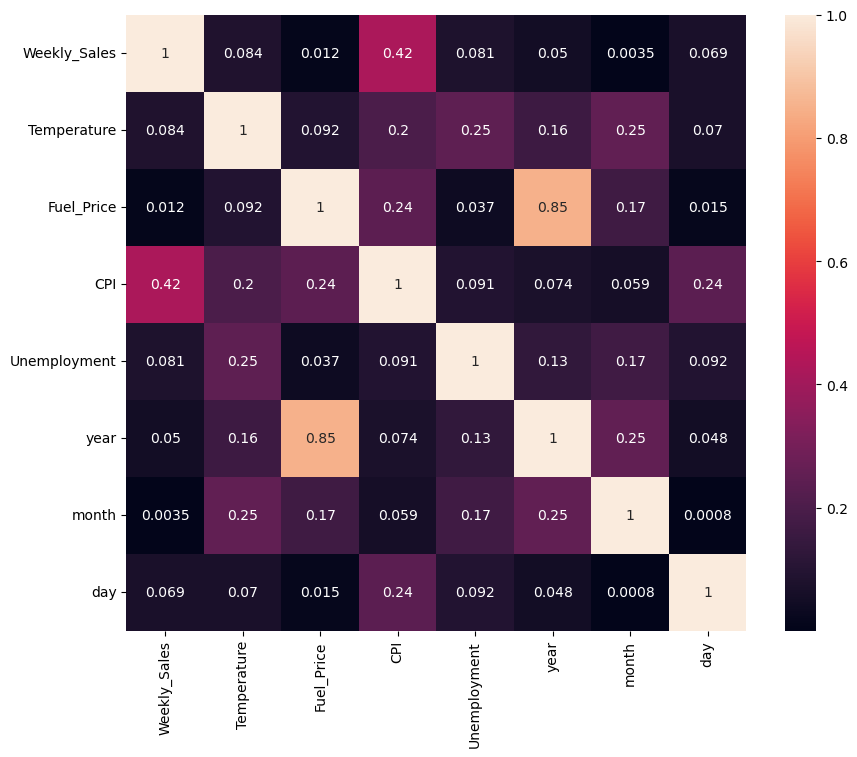

In [21]:
plt.figure(figsize=(10,8))
data_corr=data_num.corr()
sns.heatmap(abs(data_corr),annot=True)

### It can be seen that among the numeric variables, the CPI variable seems to have a strong correlation with Weekly_Sales

# PART 2 - Linear Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## 2.1. Base model linear regression

In [23]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["Store", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment", "year", "month", "day"]
target_variable = "Weekly_Sales"

X = df_cleaned.loc[:,features_list]
Y = df_cleaned.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
4    1644470.66
6     695396.19
7    2203523.20
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           0.0        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
6   15.0           0.0        69.80       4.069  134.855161         7.658   
7   20.0           0.0        39.93       3.617  213.023622         6.961   

   year  month  day  
0  2011      2   18  
1  2011      3   25  
4  2010      5   28  
6  2011      6    3  
7  2012      2    3  


In [24]:
# Select numeric and categorical features
numeric_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "year", "month", "day"]
categorical_features = ["Store", "Holiday_Flag"]


In [25]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



### 2.1.1. Preprocessing

In [26]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
])

In [27]:
# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [28]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [29]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
6    15.0           0.0        69.80       4.069  134.855161         7.658   
38    4.0           0.0        81.85       3.570  129.066300         5.946   
12    7.0           0.0        36.61       3.767  192.826069         8.595   
44    1.0           1.0        38.51       2.548  211.242170         8.106   
66   18.0           0.0        73.67       2.792  132.614193         9.342   

    year  month  day  
6   2011      6    3  
38  2011      6   24  
12  2011      5   13  
44  2010      2   12  
66  2010      8    6  
...Done.
[[ 0.58589224  1.56199819 -1.05536176  0.30814094  0.18751465 -0.1099386
  -1.45366334  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.        ]
 [ 1.28430802  0.5704465  -1.20398254 -1.503

In [30]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on test set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
85     2.0           0.0        44.69       2.976  211.064888         8.028   
45     2.0           0.0        54.63       3.555  220.275944         7.057   
48     1.0           0.0        91.65       3.684  215.544618         7.962   
144    3.0           0.0        73.44       3.594  226.968844         6.034   
73     1.0           0.0        85.22       2.619  211.567306         7.787   

     year  month  day  
85   2011      1    7  
45   2012      2   24  
48   2011      8    5  
144  2012     10   19  
73   2010      8   27  
...Done.
[[-0.86947875 -0.60987756  0.90121453  0.69957796  0.18751465 -1.78519352
  -0.99022895  1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.29335818  0.54064033  1.137

### 2.1.2 Train Model

In [31]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


### 2.1.3. Performance assessment

In [32]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[ 661380.37853431 2061045.73980381  486742.86840613 1578493.40971206
 1095494.12549501 2133702.80741534 2518647.67146016 1238702.77753236
 2015264.9216062   454330.2128773   917521.09678712 1757242.51
 1138177.76012646  331254.01626385 2200189.78315568 2150438.0527403
 1916812.74       2000887.24017446  206702.74457031  649971.0121123
 2368905.61558034  507042.26016432 1559675.57192377  466162.3871227
  468963.98228846 1936564.34424488 1892249.70174755 2071002.59126832
  502505.27247487 1406335.63545267 1557742.07430249  591413.18725897
 1550973.98850416  590447.01487706  897744.11569951 1902653.03721437
  800983.97800285 1613411.15574607 2088151.29241021 1365464.19922333
  814364.32003262 1384941.8536813   823248.75330657  482389.20368854
 1322679.27560618 1536469.90233016 1677446.23598544 1099585.17867902
  494836.49775075  906970.68049603 1889394.46301482 1893717.77278564
  976536.43268422  470681.94971239  158020.73526537 1970529.65903444
 19

In [33]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[1694338.32511571 1852407.9413629  1538205.98843235  660892.34283271
 1584407.11756329 2003186.34759408   68887.23148082  536338.439562
 1789532.08573116  591265.33228711  572424.41174971  537960.74740278
 1575480.44385935 2105562.44325828  497465.73392212 1999083.4492403 ]



In [34]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.983619043388679
R2 score on test set :  0.958473828110397


In [35]:
# Print MSE
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
print("MSE on training set : ",mse_train)
print("MSE on test set : ",mse_test)  

MSE on training set :  7435595388.127701
MSE on test set :  19274145324.97666


In [36]:
# Print RMSE
print("RMSE on training set : ",np.sqrt(mse_train))
print("RMSE on test set : ",np.sqrt(mse_test)) 

RMSE on training set :  86229.89845829405
RMSE on test set :  138831.35569811548


In [37]:
regressor.coef_

array([  -57618.83243446,   -83708.48625788,  1635967.8598048 ,
         -93577.07421685,   -97008.21241701,    38889.75562494,
         -46730.72624319,   178266.823113  , -1457640.63481205,
        4032685.85080676, -1497071.01068983,   -66594.50088033,
        -122192.89244293,  -999060.97271649, -1452849.06558871,
        3964692.64613119,    59141.37850539,  3923910.23578486,
        1799143.36948747,  2488429.60918335,  -305609.06956781,
        2581063.09332801,  2857657.90057503,  3188165.58731193,
         618922.59717686,  -131510.51897562])

In [38]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'day', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [39]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
Temperature,-5.761883e+04
Fuel_Price,-8.370849e+04
CPI,1.635968e+06
Unemployment,-9.357707e+04
year,-9.700821e+04
month,3.888976e+04
day,-4.673073e+04
Store_2.0,1.782668e+05
Store_3.0,-1.457641e+06
Store_4.0,4.032686e+06


In [40]:
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
month,3.888976e+04
day,4.673073e+04
Temperature,5.761883e+04
Store_11.0,5.914138e+04
Store_6.0,6.659450e+04
Fuel_Price,8.370849e+04
Unemployment,9.357707e+04
year,9.700821e+04
Store_7.0,1.221929e+05
Holiday_Flag_1.0,1.315105e+05


In [41]:
# Plot coefficients sorted from highest to lowest
fig = px.bar(feature_importance.sort_values(by = 'coefficients', ascending=False), orientation='v')
fig.update_layout(showlegend=True, 
                 margin={'l': 120}  # to avoid cropping of column names
                )
fig.show()

In [42]:
coefs['category'] = coefs.index.str.rsplit('_', n=1).str[0]

In [43]:
coefs

,coefficients,category
Temperature,-5.761883e+04,Temperature
Fuel_Price,-8.370849e+04,Fuel
CPI,1.635968e+06,CPI
Unemployment,-9.357707e+04,Unemployment
year,-9.700821e+04,year
month,3.888976e+04,month
day,-4.673073e+04,day
Store_2.0,1.782668e+05,Store
Store_3.0,-1.457641e+06,Store
Store_4.0,4.032686e+06,Store


In [44]:
grouped_coefs = coefs.groupby('category').sum()

In [45]:
# Plot coefficients sorted from highest to lowest
fig = px.bar(grouped_coefs.sort_values(by = 'coefficients', ascending=False), orientation='v')
fig.update_layout(showlegend=True, 
                 margin={'l': 120}  # to avoid cropping of column names
                )
fig.show()

## 2.2. Observations :

- we can see that the test R2 score is slightly lower than the train scores, this indicates a slight overfitting


# PART 3 - Fight Overfitting

We will use grid search to find the best value for $\alpha$ to use for Lasso and Ridge regression.  
* Ridge: $\alpha = $ [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
* Lasso: $\alpha = $ [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

### 3.1. Ridge Regression

In [46]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
}
best_ridge = GridSearchCV(regressor, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
best_ridge.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_ridge.best_params_)
print("Best R2 score : ", best_ridge.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.01}
Best R2 score :  0.9253320975570043


In [47]:
y_train_pred_ridge = best_ridge.predict(X_train)
y_test_pred_ridge = best_ridge.predict(X_test)

In [ ]:
mse_train_ridge = mean_squared_error(Y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(Y_test, y_test_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

In [49]:
print("Ridge score")
print(f"Train MSE: {mse_train_ridge:.2f}, Test MSE: {mse_test_ridge:.2f}")
print(f"Train RMSE: {rmse_train_ridge:.2f}, Test RMSE: {rmse_test_ridge:.2f}")


Ridge score
Train MSE: 8329531215.29, Test MSE: 10816436371.53
Train RMSE: 91266.27, Test RMSE: 104002.10


### 3.2. Lasso Regression

In [50]:
# Perform grid search
print("Grid search...")
regressor = Lasso()
# Grid of values to be tested
params = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
    'max_iter': [1000],
    'tol': [1e-2],
}
best_lasso = GridSearchCV(regressor, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
best_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_lasso.best_params_)
print("Best R2 score : ", best_lasso.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.01, 'max_iter': 1000, 'tol': 0.01}
Best R2 score :  0.9151049587529855


In [51]:
y_train_pred_lasso = best_lasso.predict(X_train)
y_test_pred_lasso = best_lasso.predict(X_test)

In [ ]:
mse_train_lasso = mean_squared_error(Y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(Y_test, y_test_pred_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)

In [53]:
print("Lasso score")
print(f"Train MSE: {mse_train_lasso:.2f}, Test MSE: {mse_test_lasso:.2f}")
print(f"Train RMSE: {rmse_train_lasso:.2f}, Test RMSE: {rmse_test_lasso:.2f}")

Lasso score
Train MSE: 9048181463.26, Test MSE: 8735079045.95
Train RMSE: 95121.93, Test RMSE: 93461.64


### 3.3 Comparing Models

In [54]:
# Print R^2 scores
print("RIDGE / R2 score on training set : ", best_ridge.score(X_train, Y_train))
print("RIDGE / R2 score on test set : ", best_ridge.score(X_test, Y_test))
print()
print("LASSO / R2 score on training set : ", best_lasso.score(X_train, Y_train))
print("LASSO / R2 score on test set : ", best_lasso.score(X_test, Y_test))

RIDGE / R2 score on training set :  0.9816496618887941
RIDGE / R2 score on test set :  0.9766959733661931

LASSO / R2 score on training set :  0.9800664425342974
LASSO / R2 score on test set :  0.9811802605088197


### 3.4. Final Observations

- We note that Ridge and Lasso regulation we obtain best RMSE on test set than baseline.This suggest improvement of the model by regularization.
- It seem that Lasso is the best model among the three with the lowest score RMSE on the test set.
- We note that the strongest feature is "Store". Indeed the size of the store, the location of the store, the staff are all parameters that differ by store. These are all factors that can influence the sales of the week. It would have been interesting to have more data on the stores (surface, number of employees, location,etc...).
- It would have been interesting to make a model with only Store and CPI to see if this model is as efficient as the model with all the features.